##Description :

The main objectve of the dataset is to predict whether a person has diabetes or not, based on certain diagnostic measurements included in the dataset. The dataset consists of several medical features on which the prediction are supposed to be made and their is one target variable i.e., Outcome . The variables on which predictions are supposed to be made includes the number of pregnancies the patient had, their BMI i.e, Body Mass Index , Insulin level, Age, and so on. 

Dataset url : https://www.kaggle.com/rahulsah06/machine-learning-for-diabetes-with-python

##Step 0: Import libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing dataset
data = pd .read_csv('/content/Diabetes_dataset/diabetes_data.csv')

## Step 1: Descriptive Statistics 

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
data.isnull().values.any()

False

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##Observations :

1. There are a total of 768 records and 9 features in the dataset.
2. Each feature is either of integer or float datatype.
3. Some features like Glucose, Blood Pressure, Insulin, BMI has zero values.
4. There are zero NaN values in the dataset.
5. In the outcome column, 1 represent diabetes positive and 0 represents diabetes negative.

##Step 2: Data Visualization

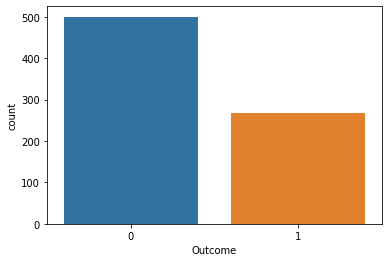

In [ ]:
sns.countplot(x = 'Outcome', data = data)

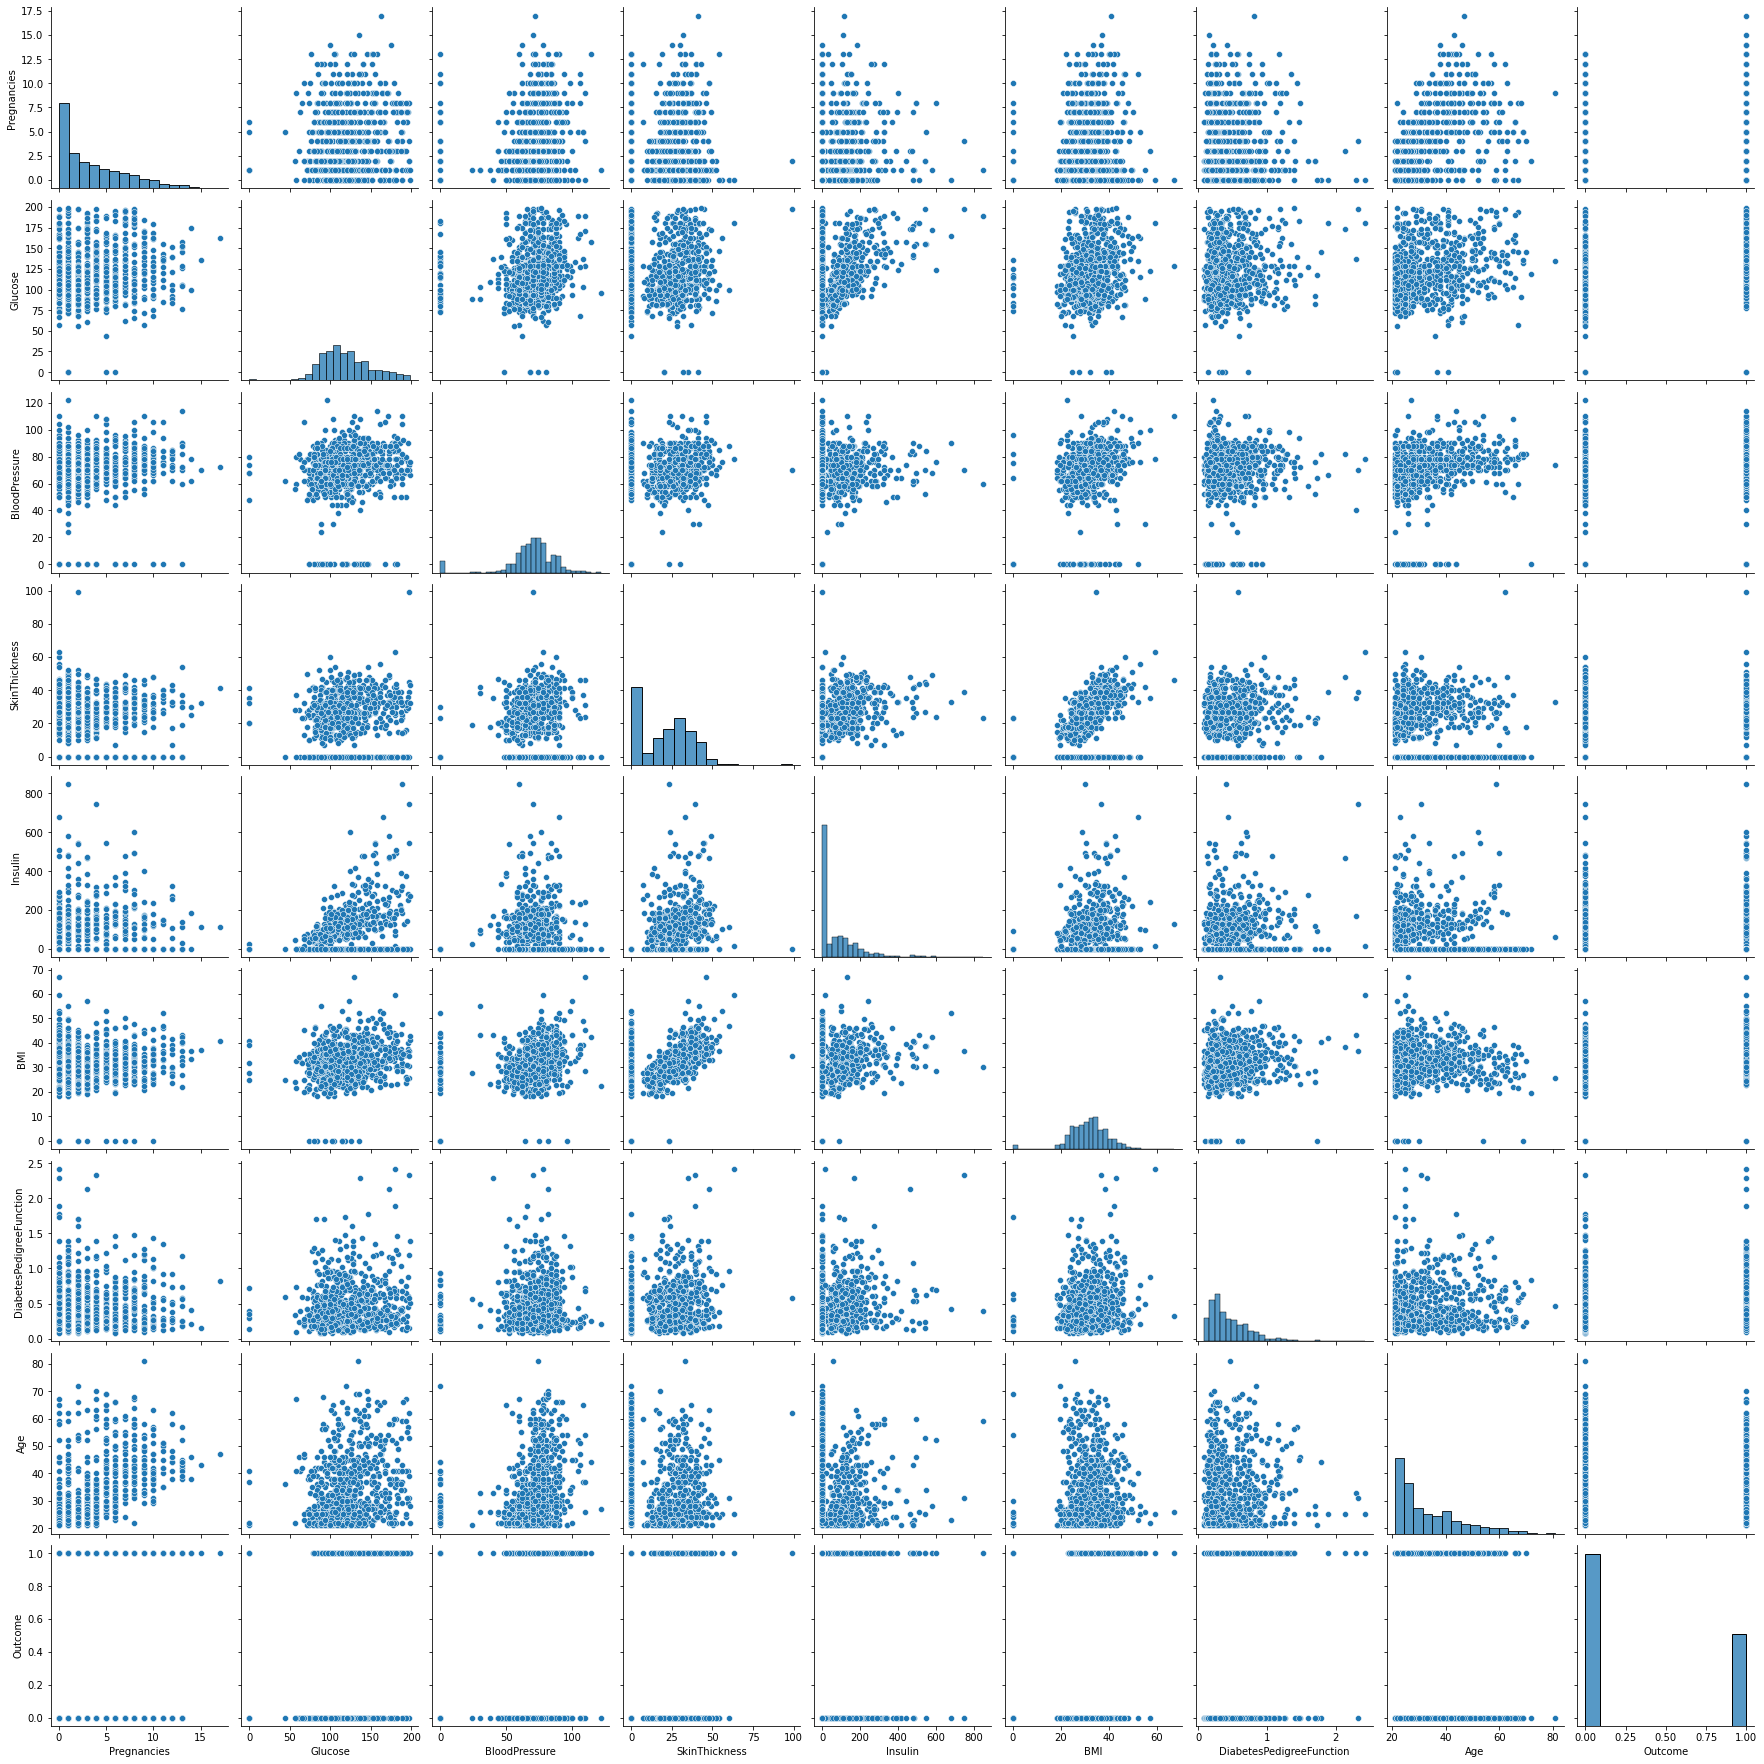

In [ ]:
g = sns.pairplot(data)
g.fig.set_size_inches(25,25)

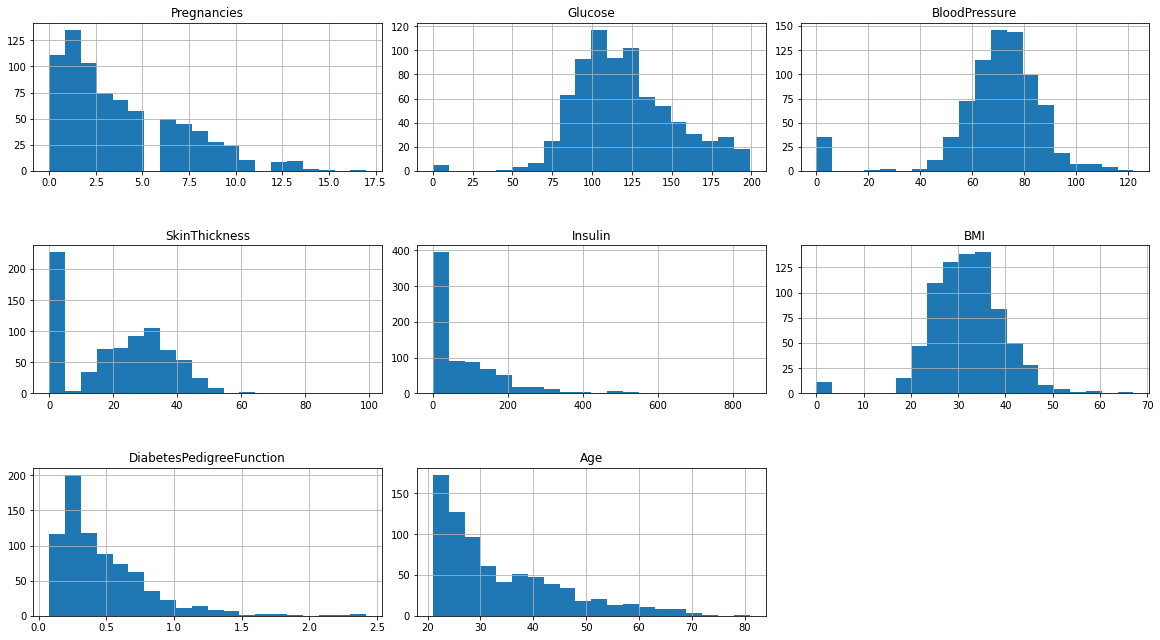

In [ ]:
# Hisogram of each feature
import  itertools

col = data.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
  plt.subplot((length/2), 3, j + 1)
  plt.subplots_adjust(wspace = 0.1, hspace = 0.5)
  data[i].hist(bins = 20)
  plt.title(i)
plt.show()    

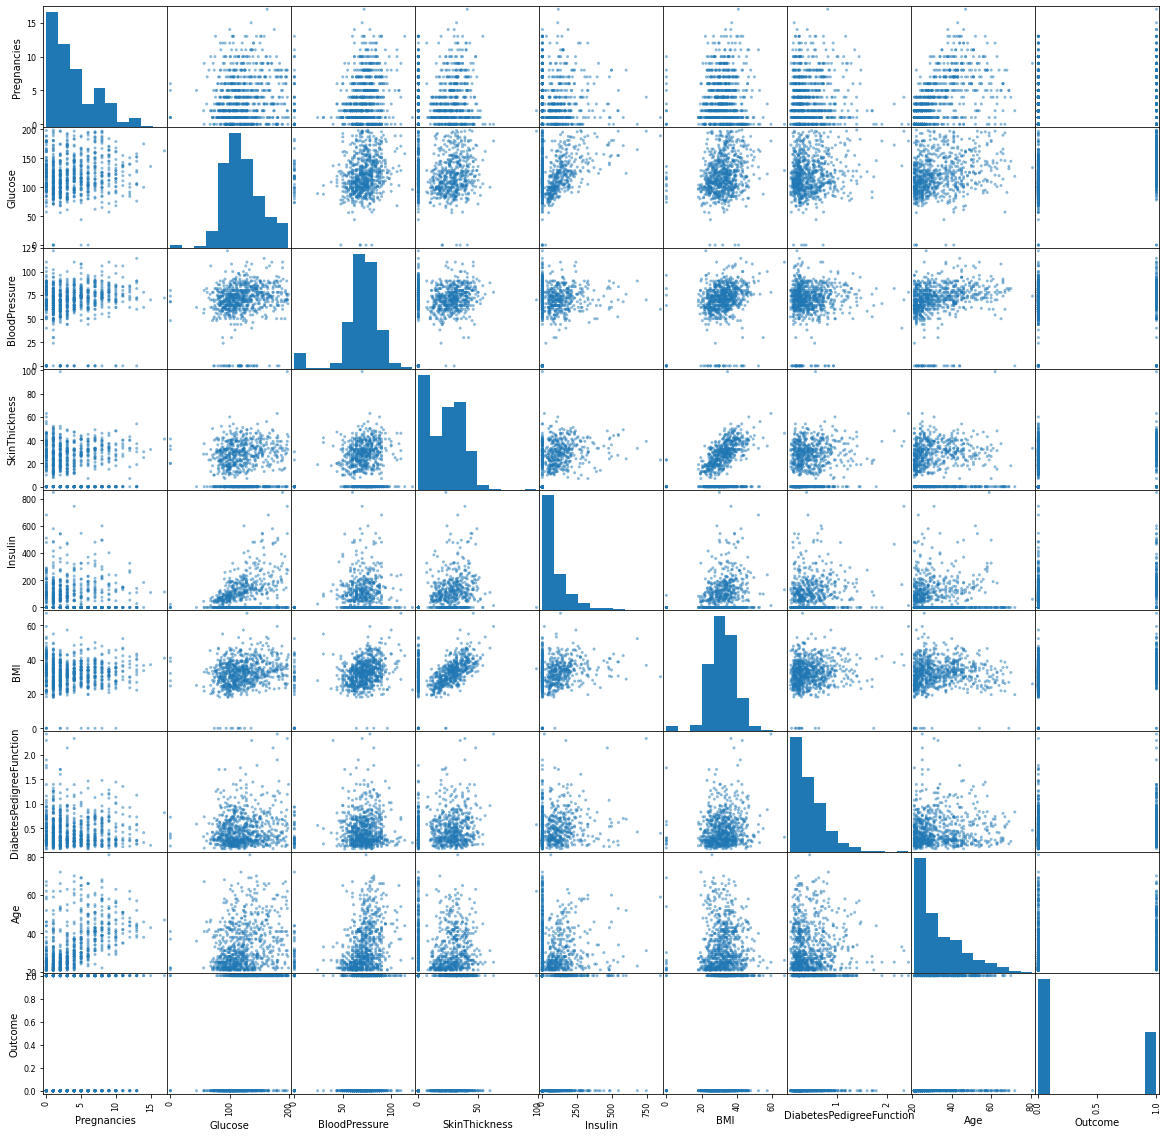

In [ ]:
# Scatter plot matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize = (20, 20));

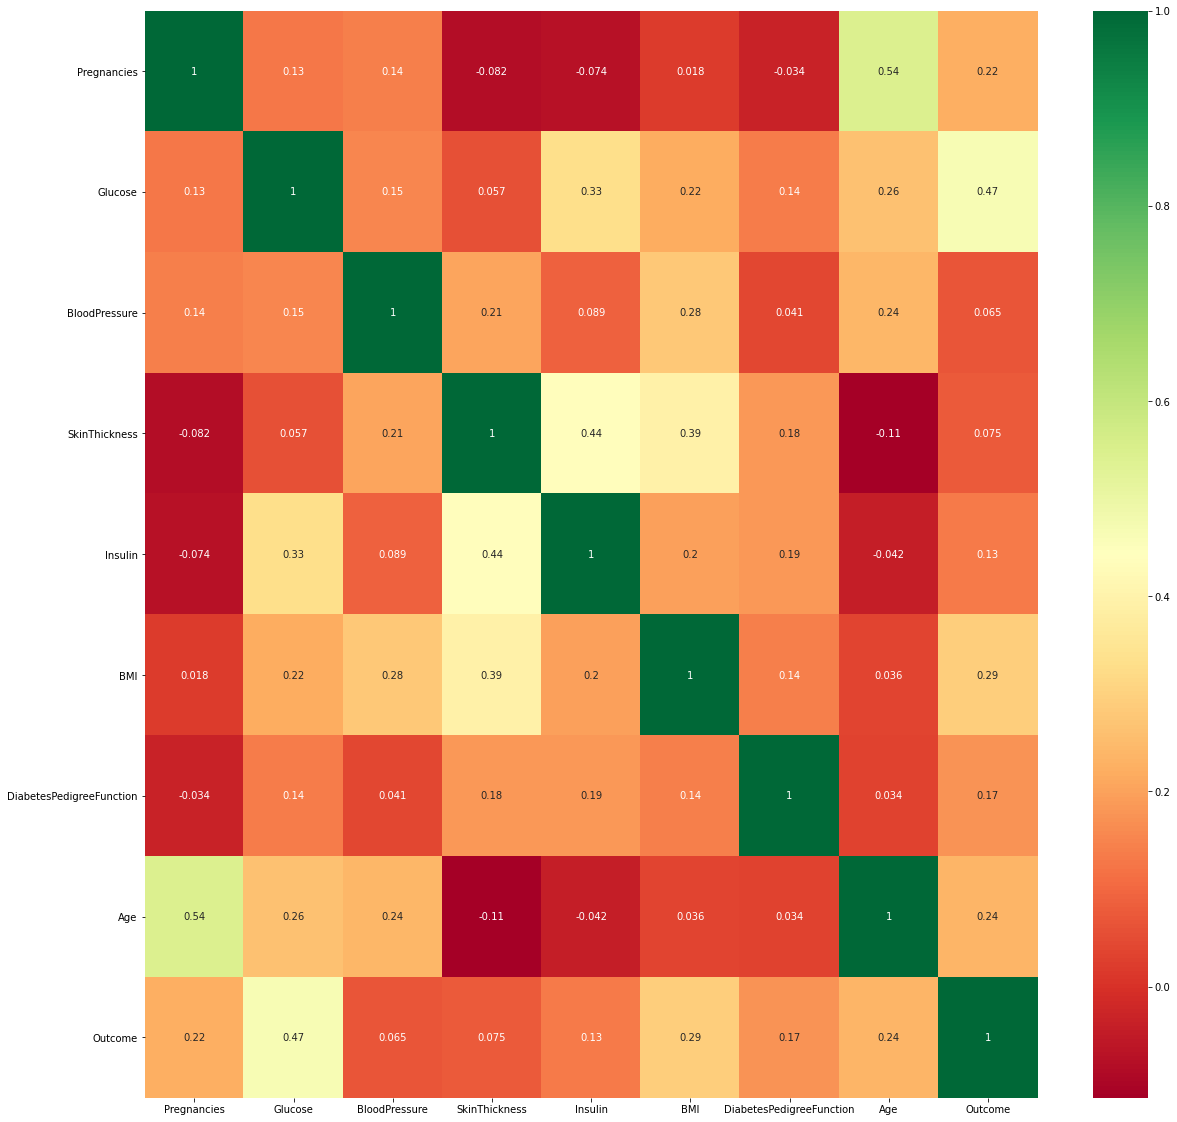

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

##Observations:
1. The Countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do. 
2. From the correlation  heatmap, we can see that there is a high correlation between Outcome and Pregnancies, Glucose, Insulin, BMI, DiabetesPedigreeFunction, Age. We can select these features to accept input from the user and predict the outcome.

##Step 3: Data Preprocessing

In [ ]:
new_data = data

In [ ]:
# replacing zero values with NaN
new_data[["Glucose", "BloodPressure" , "SkinThickness" , "Insulin" , "BMI" ]] = new_data[["Glucose", "BloodPressure" , "SkinThickness" , "Insulin" , "BMI"]].replace(0, np.NaN)

In [ ]:
# Count of NaN
new_data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# Replacing NaN with mean values
new_data["Glucose"].fillna(new_data["Glucose"].mean(), inplace = True)
new_data["BloodPressure"].fillna(new_data["BloodPressure"].mean(), inplace = True)
new_data["SkinThickness"].fillna(new_data["SkinThickness"].mean(), inplace = True)
new_data["Insulin"].fillna(new_data["Insulin"].mean(), inplace = True)
new_data["BMI"].fillna(new_data["BMI"].mean(), inplace = True)

In [ ]:
# Statistical summary
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [ ]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
dataset_scaled = sc.fit_transform(new_data)

In [ ]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [ ]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1,4,5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [ ]:
# Train_Test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = new_data['Outcome'])

In [ ]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape (154,)


##Step 4: Data Modelling

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


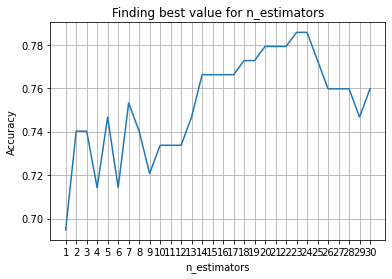

Highest value:  0.7857142857142857


In [ ]:
# Plotting graph for n_neighbors
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1, 31)

for i in list(range(1,31)):
  knn_model = KNeighborsClassifier(n_neighbors = i)
  knn_model.fit(X_train, Y_train)
  prediction = knn_model.predict(X_test)
  acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print("Highest value: " , acc.values.max())  

In [ ]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [ ]:
# Support vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 40)
svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=40, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy' , random_state = 40)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [ ]:
# Making predicctions on test dataset
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

##Step 5: Model Evaluation

In [ ]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [ ]:
# Accuracy on test set
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

K Nearest neighbors: 78.57142857142857
Support Vector Classifier: 73.37662337662337
Random Forest: 74.02597402597402


## From the above comparison, we can observe that K Nearest neighbors gets the highest accuracy 

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[87, 13],
       [20, 34]])

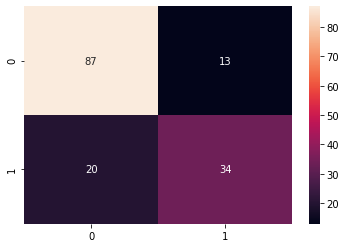

In [ ]:
# Heatmap  of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot = True)

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       100
         1.0       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154

